In [1]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
import pandas as pd
data_newfeature = pd.read_csv('/content/drive/My Drive/Clustered_Customer_Sales_Data.csv')



In [6]:
! git clone https://github.com/uber/causalml.git
! cd causalml
! pip install -r /content/causalml/docs/requirements.txt

Cloning into 'causalml'...
remote: Enumerating objects: 4142, done.
remote: Counting objects: 100% (1510/1510), done.
remote: Compressing objects: 100% (377/377), done.
remote: Total 4142 (delta 1332), reused 1163 (delta 1133), pack-reused 2632
Receiving objects: 100% (4142/4142), 95.74 MiB | 25.06 MiB/s, done.
Resolving deltas: 100% (2699/2699), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.4/561.4 kB 15.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for oset: filename=oset-0.1.3-py3-none-any.whl size=9670 sha256=ba5c55c0e31f39491c0f30b512603e144cc67e070f0f3173789149d6bdb3582f
  Stored in directory: /root/.cache/pip/wheels/9b/d6/ec/991a2c61daeed8e2b2beb7166d828418c0fc41a2e6b38df8a4
Successfully built oset


In [7]:
! pip install causalml[tf]
! pip install -U numpy==1.23.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 15.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 76.9 MB/s eta 0:00:00
  Using cached Cython-0.29.34-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 48.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 51.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 745.2/745.2 kB 63.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 21.2 MB/s eta 0:00:00
  Created

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 70.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
chex 0.1.85 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
plotnine 0.12.4 requires pandas>=1.5.0, but you have pandas 1.3.5 which is incompatible.
pygam 0.9.1 requires numpy>=1.25; python_version >= "3.9" and python_version < "3.13", but you have numpy 1.23.5 which is incompatible.
xarray 2023.7.0 requires pandas>=1.4, but you have pandas 1.3.5 which is incompatible.


In [8]:
!pip install -U scikit-learn

  Using cached scikit_learn-1.4.1.post1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.21.0 requires pandas<2.1.4,>=1.5.0, but you have pandas 1.3.5 which is incompatible.


# Marry Stage

In [23]:
import pandas as pd
import numpy as np
from causalml.inference.meta import LRSRegressor, XGBTRegressor
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import shap
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7c6ffd5bc550>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1008, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1147, in _make_controller_from_path
    lib_controller = controller_class(
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 113, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: /usr/local/lib/python3.10/dist-packages/numpy.libs/libopenblas64_p-r0-5007b62f.3.23.dev.so: cannot open shared object file: No such file or directory


In [24]:
# All Puechases as Target
data_newfeature['Allpurchases'] = data_newfeature['NumWebPurchases'] + data_newfeature['NumCatalogPurchases'] + data_newfeature['NumStorePurchases']


#  treatment
data_newfeature['treatment'] = data_newfeature['Marital_Status_Married']

# control
control_columns = [
    'Marital_Status_Alone', 'Marital_Status_Divorced', 'Marital_Status_Single',
    'Education_Master','Marital_Status_Widow', 'Marital_Status_YOLO',
    'Age', 'Income', 'Total_Children', 'Is_Parent', 'Member_Year', 'Family_Size',
    'Education_Basic', 'Education_Graduation', 'Marital_Status_Together', 'Education_PhD'
]


X = data_newfeature[control_columns]
y = data_newfeature['Allpurchases']
treatment_binary = data_newfeature['treatment']

# train and test
X_train, X_test, y_train, y_test, treatment_train, treatment_test = train_test_split(X, y, treatment_binary, test_size=0.2, random_state=42)

# Model
lr_model = LRSRegressor()
xgb_model = XGBTRegressor()

# Train
lr_model.fit(X_train, treatment_train, y_train)
xgb_model.fit(X_train, treatment_train, y_train)

# estimate
predictions_lr = lr_model.predict(X_test)
predictions_xgb = xgb_model.predict(X_test)

# RMSE
rmse_lr = np.sqrt(mean_squared_error(y_test, predictions_lr))
rmse_xgb = np.sqrt(mean_squared_error(y_test, predictions_xgb))

print(f"LR Model RMSE: {rmse_lr}")
print(f"XGB Model RMSE: {rmse_xgb}")

# cross validation ATE
def cross_validate_ate(estimator, X, treatment, y, cv=5):
    kf = KFold(n_splits=cv, shuffle=True, random_state=42)
    ate_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        treatment_train, treatment_test = treatment.iloc[train_index], treatment.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        estimator.fit(X_train, treatment_train, y_train)
        ate_estimate = estimator.estimate_ate(X_test, treatment_test, y_test)[0]
        ate_scores.append(ate_estimate)

    return np.mean(ate_scores), np.std(ate_scores)

# LRSRegressor ATE
ate_mean, ate_std = cross_validate_ate(lr_model, X, treatment_binary, y, cv=5)
print(f"LRSRegressor ATE: {ate_mean} (±{ate_std})")

# XGBTRegressor ATE
ate_mean, ate_std = cross_validate_ate(xgb_model, X, treatment_binary, y, cv=5)
print(f"XGBTRegressor ATE: {ate_mean} (±{ate_std})")

LR Model RMSE: 10.956445164050264
XGB Model RMSE: 15.080418781425147
LRSRegressor ATE: 3.4337449806629676 (±8.865700408669932)
XGBTRegressor ATE: 0.31768077049308374 (±0.559832955343623)


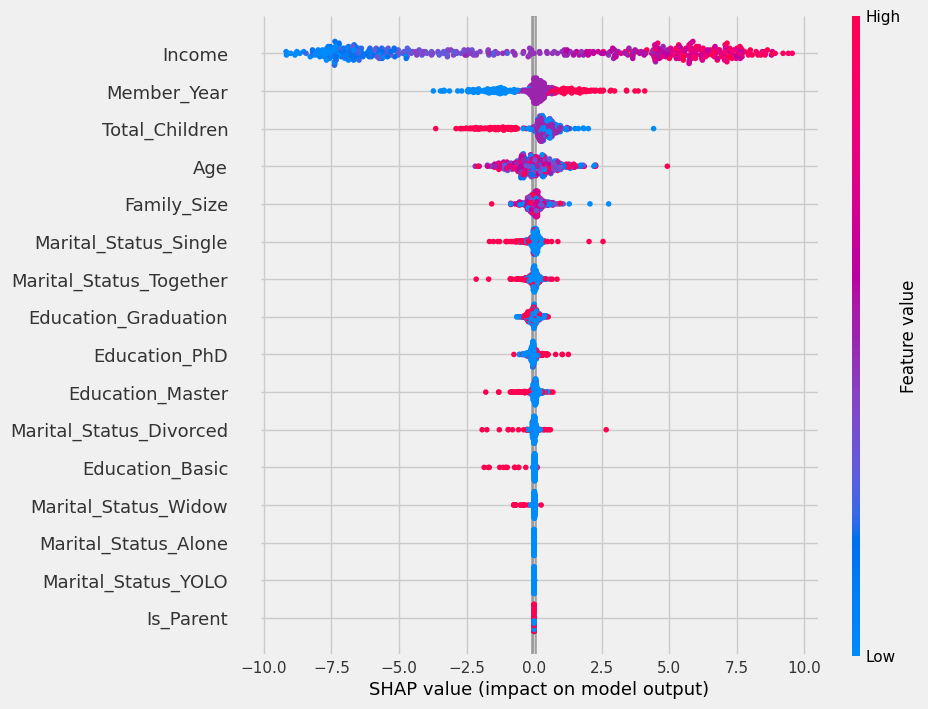

In [25]:
# Use the trained XGB model to obtain SHAP values for the test set
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
explainer = shap.Explainer(xgb)
shap_values = explainer(X_test)

# Plot the SHAP values for high and low income
shap.plots.beeswarm(shap_values, max_display=30)

Complain

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
X = data_newfeature[['Age', 'Member_Year', 'Family_Size', 'Education_Basic', 'Education_Graduation', 'Education_Master', 'Education_PhD', 'Income', 'Total_Children', 'Is_Parent']]
data_newfeature['New_Purchases'] = data_newfeature['NumWebPurchases'] + data_newfeature['NumCatalogPurchases'] + data_newfeature['NumStorePurchases']
y = data_newfeature['New_Purchases']
treatment = data_newfeature['Complain']


numeric_features = ['Age', 'Member_Year', 'Family_Size', 'Income', 'Total_Children']
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features)])


X_train, X_test, y_train, y_test, treatment_train, treatment_test = train_test_split(X, y, treatment, test_size=0.2, random_state=42)


In [29]:
from sklearn.metrics import mean_squared_error
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)
lrs = LRSRegressor()
lrs.fit(X_train_preprocessed, treatment_train, y_train)


lrs_ate = lrs.estimate_ate(X_train_preprocessed, treatment_train, y_train)
lrs_ite = lrs.predict(X_test_preprocessed)
lrs_rmse = np.sqrt(mean_squared_error(y_test, lrs_ite))
print(f"RMSE for LRSRegressor: {lrs_rmse}")

print(f"Estimated ATE using LRSRegressor: {lrs_ate[0]}")

RMSE for LRSRegressor: 15.058959403482827
Estimated ATE using LRSRegressor: [-0.01235481]


In [30]:
# Initialize and train the model using XGBTRegressor
from causalml.inference.meta import XGBTRegressor
xgbt = XGBTRegressor()
xgbt.fit(X_train_preprocessed, treatment_train, y_train)

# Estimate ATE and ITE
xgbt_ate = xgbt.estimate_ate(X_train_preprocessed, treatment_train, y_train)
xgbt_ite = xgbt.predict(X_test_preprocessed)

# Output results
xgbt_rmse = np.sqrt(mean_squared_error(y_test, xgbt_ite))
print(f"RMSE for XGBTRegressor: {xgbt_rmse}")
print(f"Estimated ATE using XGBTRegressor: {xgbt_ate[0]}")

RMSE for XGBTRegressor: 14.92656293463261
Estimated ATE using XGBTRegressor: [0.39750431]


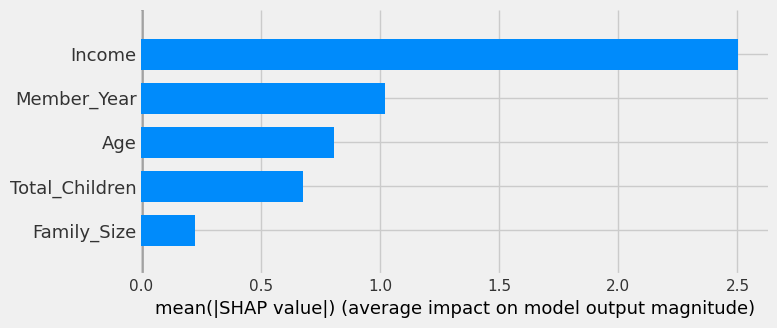

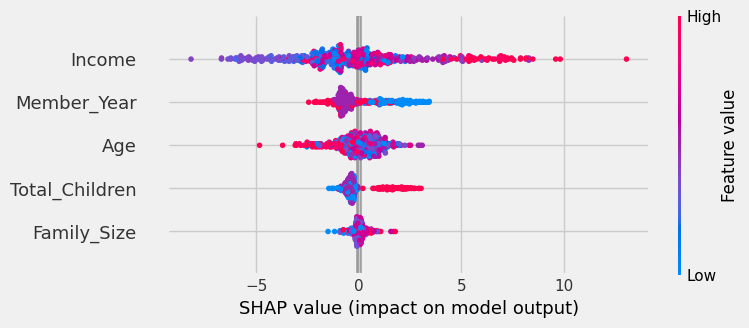

In [31]:
from xgboost import XGBRegressor
import shap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


t_pred = xgbt_ite


xgb = XGBRegressor()
xgb.fit(X_test_preprocessed, t_pred)


explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test_preprocessed)


feature_names = [
    'Age', 'Member_Year', 'Family_Size', 'Income', 'Total_Children', 'Is_Parent',
    'Education_Basic', 'Education_Graduation', 'Education_Master', 'Education_PhD'
]


shap.summary_plot(shap_values, X_test_preprocessed, feature_names=feature_names, plot_type="bar")


plt.figure(figsize=(10, 7))
shap.summary_plot(shap_values, X_test_preprocessed, feature_names=feature_names)

Income

In [35]:
median_income = data_newfeature['Income'].median()
data_newfeature['High_Income'] = (data_newfeature['Income'] >= median_income).astype(int)

control_cols = ['Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
                'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                'MntGoldProds', 'NumWebVisitsMonth',
                'Complain', 'Response', 'Member_Year',
                'Age', 'Total_purchase', 'Total_Children',
                'Family_Size', 'Cmp_Attitude', 'Education_Basic',
                'Education_Graduation', 'Education_Master', 'Education_PhD',
                'Marital_Status_Alone', 'Marital_Status_Divorced',
                'Marital_Status_Married', 'Marital_Status_Single',
                'Marital_Status_Together', 'Marital_Status_Widow',
                'Marital_Status_YOLO']

# Creating Total_Purchases as Target in the updated DataFrame
data_newfeature['Total_Purchases'] = data_newfeature['NumWebPurchases'] + data_newfeature['NumCatalogPurchases'] + data_newfeature['NumStorePurchases']

X = data_newfeature[control_cols]
y = data_newfeature['Total_Purchases']

# Treatment variable from the updated DataFrame
treatment = data_newfeature['High_Income']

# Standardize the control variables
scaler = StandardScaler()

# Create a copy of the dataframe to avoid SettingWithCopyWarning
X_scaled = data_newfeature[control_cols].copy()
X_scaled[control_cols] = scaler.fit_transform(X_scaled)

# Now split your data
X_train, X_test, y_train, y_test, treatment_train, treatment_test = train_test_split(
    X_scaled, y, treatment, test_size=0.2, random_state=2024
)


In [36]:
# Initialize models
lr_model = LRSRegressor()
xgb_model = XGBTRegressor()

# Train models
lr_model.fit(X_train, treatment_train, y_train)
xgb_model.fit(X_train, treatment_train, y_train)

# Make predictions
predictions_lr = lr_model.predict(X_test)
predictions_xgb = xgb_model.predict(X_test)

# Calculate RMSE for the models
rmse_lr = np.sqrt(mean_squared_error(y_test, predictions_lr))
rmse_xgb = np.sqrt(mean_squared_error(y_test, predictions_xgb))
print(f"LR Model RMSE: {rmse_lr}")
print(f"XGB Model RMSE: {rmse_xgb}")

# Define a function to perform cross-validated ATE estimation
def cross_validate_ate(model, X, treatment, y, cv=5):
    kf = KFold(n_splits=cv, shuffle=True, random_state=2024)
    ates = []

    for train_index, test_index in kf.split(X):
        X_train_kf, X_test_kf = X.iloc[train_index], X.iloc[test_index]
        treatment_train_kf, treatment_test_kf = treatment.iloc[train_index], treatment.iloc[test_index]
        y_train_kf, y_test_kf = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train_kf, treatment_train_kf, y_train_kf)
        ate_est = model.estimate_ate(X_test_kf, treatment_test_kf, y_test_kf)[0]
        ates.append(ate_est)
    return np.mean(ates), np.std(ates)

# Cross-validated ATE for LR model
ate_mean_lr, ate_std_lr = cross_validate_ate(lr_model, X_train, treatment_train, y_train, cv=5)
print(f"LRSRegressor ATE: {ate_mean_lr} (±{ate_std_lr})")

# Cross-validated ATE for XGB model
ate_mean_xgb, ate_std_xgb = cross_validate_ate(xgb_model, X_train, treatment_train, y_train, cv=5)
print(f"XGBTRegressor ATE: {ate_mean_xgb} (±{ate_std_xgb})")

LR Model RMSE: 11.263133454871205
XGB Model RMSE: 15.87780298968169
LRSRegressor ATE: 3.5146263285273376 (±0.4815625089402104)
XGBTRegressor ATE: 0.1528489376980639 (±0.7220756294831825)


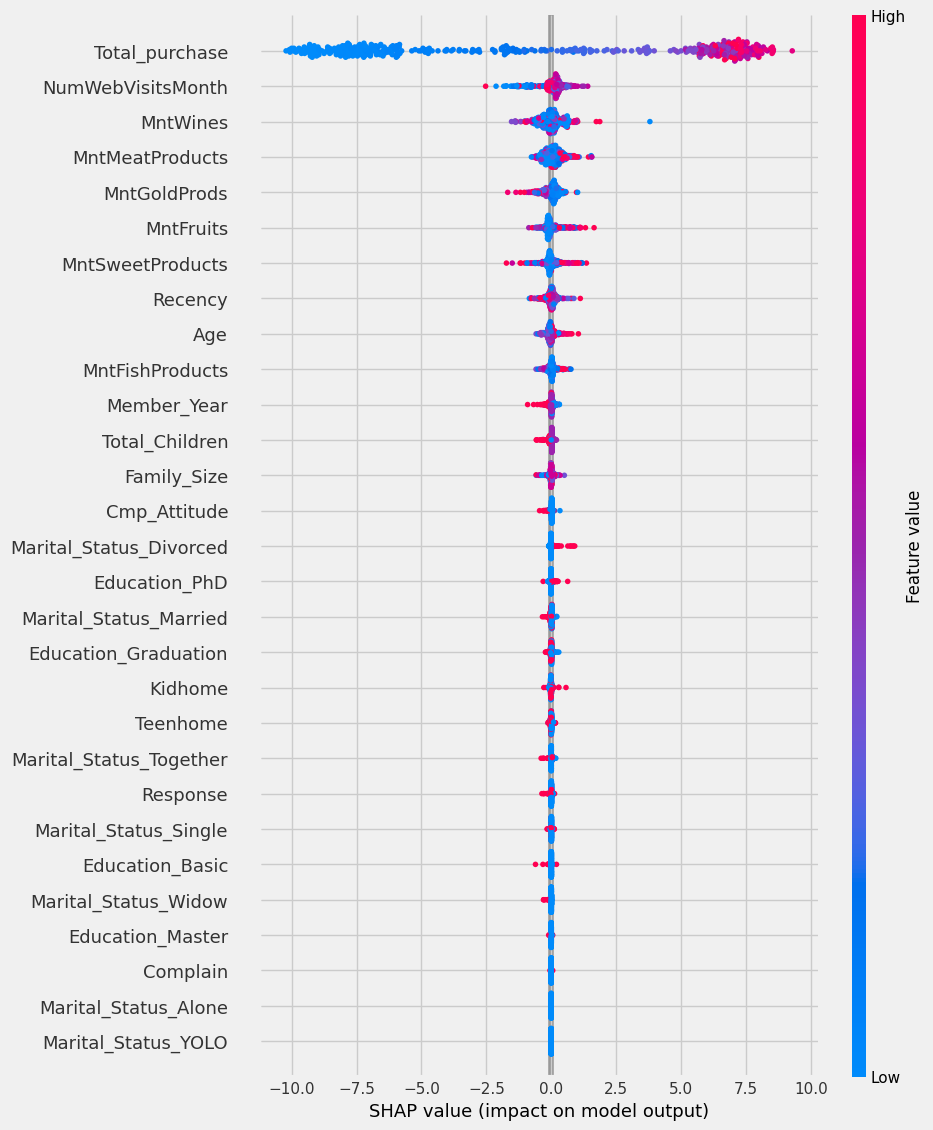

In [37]:
# Use the trained XGB model to obtain SHAP values for the test set
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
explainer = shap.Explainer(xgb)
shap_values = explainer(X_test)

# Plot the SHAP values for high and low income
shap.plots.beeswarm(shap_values, max_display=30)